   #                                MOVIE LENS PROJECT

# Submitted by :Dr.Thyagaraju G S
# e-mail : innovationscontext@gmail.com
# Mobile : 7090820910

# Import Libraries

In [3]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library

# 1. Import Three Data Sets

## 1.1 Importing Movies Data

In [4]:
movies = pd.read_csv("movies.dat" , sep = "::", names = ["MovieID", "Title","Genres"])

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
#number of unique movies
unique_movies = movies['MovieID'].unique().tolist()
len(unique_movies)

3883

In [8]:
movies.shape

(3883, 3)

In [9]:
movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


## 1.2 Importing Second Data Set :Ratings .dat

In [10]:
ratings = pd.read_csv("ratings.dat" , sep = "::",names = ["UserID", "MovieID","Rating","Timestamp"])
ratings.head()

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [13]:
ratings.shape

(1000209, 4)

In [14]:
#minimum rating given to a movie
ratings['Rating'].min() 

1

In [15]:
ratings['Rating'].max() 

5

# 1.3 Importing Third Data Set : Users.Dat

In [16]:
users = pd.read_csv("users.dat" , sep = "::",names = ["UserID", "Gender","Age","Occupation","Zip-code"])
users.head()

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [18]:
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


# 2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [19]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


In [ ]:
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')


In [ ]:
pfr = pandas_profiling.ProfileReport(master_data)
pfr.to_file("Movie_Master_Data.html")

# 3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
### 3.1 User Age Distribution
### 3.2 User rating of the movie “Toy Story”
### 3.3 Top 25 movies by viewership rating
### 3.4 Find the ratings for all the movies reviewed by for a particular user of user id = 2696

## 3.1 User age distributions 


In [20]:
#User age distribution
import matplotlib.pyplot as plt


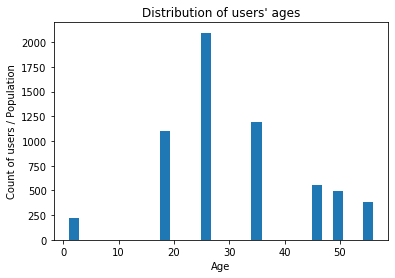

In [21]:
#User age distribution
import matplotlib.pyplot as plt
plt.title("Distribution of users' ages")
users['Age'].plot.hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count of users / Population')
plt.show()

## 3.2  User rating of the movie "Toy Story"


In [22]:
#User rating of the movie “Toy Story”
res = master_data[master_data.Title == "Toy Story (1995)"]
res.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
40,1,Toy Story (1995),1,1,F,10,5
469,1,Toy Story (1995),6,50,F,9,4
581,1,Toy Story (1995),8,25,M,12,4
711,1,Toy Story (1995),9,25,M,17,5
837,1,Toy Story (1995),10,35,F,1,5


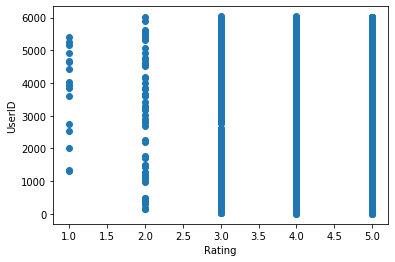

In [23]:
plt.scatter(res['Rating'],res['UserID'])
plt.xlabel("Rating")
plt.ylabel("UserID")
plt.show()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

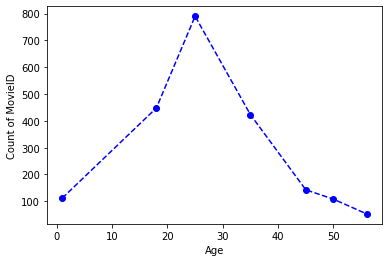

In [24]:
#User rating of the movie “Toy Story”
res = master_data[master_data.Title == "Toy Story (1995)"]
plt.plot(res.groupby("Age")["MovieID"].count(),'--bo')
plt.xlabel("Age")
plt.ylabel("Count of MovieID")
res.groupby("Age")["MovieID"].count()

Rating
1     16
2     61
3    345
4    835
5    820
Name: MovieID, dtype: int64

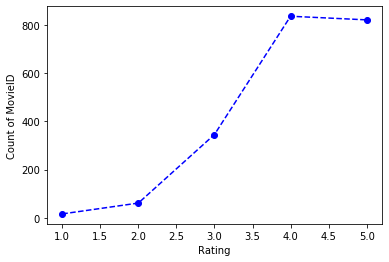

In [25]:
#User rating of the movie “Toy Story”

res = master_data[master_data.Title == "Toy Story (1995)"]
plt.plot(res.groupby("Rating")["MovieID"].count(),'--bo')
plt.xlabel("Rating")
plt.ylabel("Count of MovieID")
res.groupby("Rating")["MovieID"].count()

In [26]:
groupedby_movieName = master_data.groupby('Title')
groupedby_rating =master_data.groupby('Rating')
groupedby_uid = master_data.groupby('UserID')
#groupedby_age = df.loc[most_50.index].groupby(['MovieName', 'age_group'])

In [27]:
ToyStory_data = groupedby_movieName.get_group('Toy Story (1995)')
ToyStory_data.shape

(2077, 7)

In [28]:
#Find and visualize the viewership of the movie “Toy Story” by age group
ToyStory_data[['Title','Age']].head()

,Title,Age
40,Toy Story (1995),1
469,Toy Story (1995),50
581,Toy Story (1995),25
711,Toy Story (1995),25
837,Toy Story (1995),35


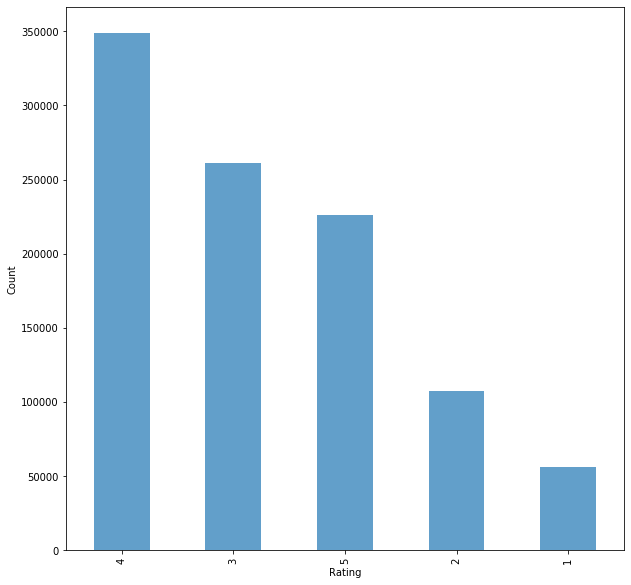

In [29]:
#Visualize overall rating by users
master_data['Rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 3.3 Top 25 movies by viewership rating 

## 3.3.1 Top Ratings 

In [30]:
master_data['Rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

## 3.3.2 Top 25 Movies based on viewership count

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

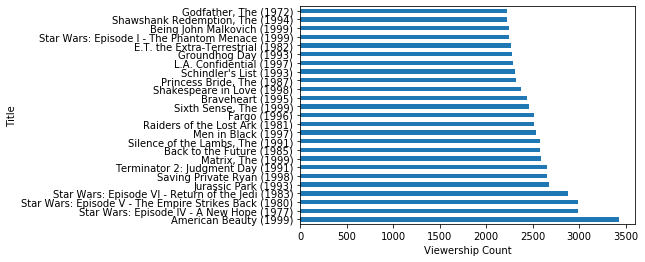

In [31]:
#Top 25 movies by viewership rating
res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh")
res

## 3.3.3 Top 25 Movies with highest rating == 4

In [32]:
groupedby_rating =master_data.groupby('Rating')
user_rating_4 = groupedby_rating.get_group(4)
user_rating_4[['Title','Rating']][:25]

,Title,Rating
3,Erin Brockovich (2000),4
8,Snow White and the Seven Dwarfs (1937),4
9,"Wizard of Oz, The (1939)",4
11,Gigi (1958),4
12,Miracle on 34th Street (1947),4
13,Ferris Bueller's Day Off (1986),4
15,Airplane! (1980),4
17,Bambi (1942),4
19,Big (1988),4
26,E.T. the Extra-Terrestrial (1982),4


# 3.4 Find the ratings for all the movies reviewed by for a particular user of user id =2696


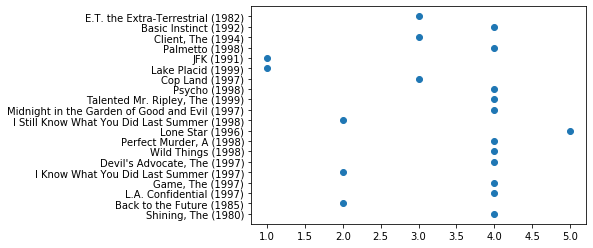

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,25,M,7,4
440668,1270,Back to the Future (1985),2696,25,M,7,2
440669,1617,L.A. Confidential (1997),2696,25,M,7,4
440670,1625,"Game, The (1997)",2696,25,M,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
440673,1805,Wild Things (1998),2696,25,M,7,4
440674,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
440675,800,Lone Star (1996),2696,25,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,M,7,2


In [33]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

res = master_data[master_data.UserID == 2696]
plt.scatter(y=res.Title, x=res.Rating)
plt.show()
res

# 4. Find out all the UNIQUE GENRES (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres) 

In [34]:
Genre_list = movies.Genres.str.split("\|")

In [35]:
Unique_Genres = []
for x in Genre_list:
    if x not in Unique_Genres:
        Unique_Genres.append(x)
print(Unique_Genres)

[['Animation', "Children's", 'Comedy'], ['Adventure', "Children's", 'Fantasy'], ['Comedy', 'Romance'], ['Comedy', 'Drama'], ['Comedy'], ['Action', 'Crime', 'Thriller'], ['Adventure', "Children's"], ['Action'], ['Action', 'Adventure', 'Thriller'], ['Comedy', 'Drama', 'Romance'], ['Comedy', 'Horror'], ['Animation', "Children's"], ['Drama'], ['Action', 'Adventure', 'Romance'], ['Drama', 'Thriller'], ['Drama', 'Romance'], ['Thriller'], ['Action', 'Comedy', 'Drama'], ['Crime', 'Drama', 'Thriller'], ['Drama', 'Sci-Fi'], ['Romance'], ['Adventure', 'Sci-Fi'], ['Adventure', 'Romance'], ["Children's", 'Comedy', 'Drama'], ['Documentary'], ['Drama', 'War'], ['Action', 'Crime', 'Drama'], ['Action', 'Adventure'], ['Crime', 'Thriller'], ['Animation', "Children's", 'Musical', 'Romance'], ['Action', 'Drama', 'Thriller'], ["Children's", 'Comedy'], ['Drama', 'Mystery'], ['Sci-Fi', 'Thriller'], ['Action', 'Comedy', 'Crime', 'Horror', 'Thriller'], ['Drama', 'Musical'], ['Crime', 'Drama', 'Romance'], ['Adve

In [36]:
len(Unique_Genres)

301

In [37]:
# Number of unique values in column genres 
movies['Genres'].nunique()

301

In [38]:
movies['Genres'].unique()[0:10]

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance'], dtype=object)

 # 4.1 Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [39]:
res = master_data.merge(movies, on = ['MovieID'], how="left")[["Genres","Rating","Gender", "Age"]]


In [40]:
res['Genres'].str.get_dummies(sep ='|').head(5)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
res.head(5)

,Genres,Rating,Gender,Age
0,Drama,5,F,1
1,Animation|Children's|Musical,3,F,1
2,Musical|Romance,3,F,1
3,Drama,4,F,1
4,Animation|Children's|Comedy,5,F,1


### To split the Collective Genres into Sub Genres

In [42]:
# To split the Collective Genres into Sub Genres

def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

###  New movies data set with splitted generes 

In [43]:
movies.Genres = movies.Genres.str.split('|')
newmovies = explode(movies, ['Genres'])
newmovies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation
1,1,Toy Story (1995),Children's
2,1,Toy Story (1995),Comedy
3,2,Jumanji (1995),Adventure
4,2,Jumanji (1995),Children's


In [44]:
newmaster_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'Genres', "Rating"]]

newmaster_data.head()

,MovieID,Title,Genres,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
1,661,James and the Giant Peach (1996),Animation|Children's|Musical,3
2,914,My Fair Lady (1964),Musical|Romance,3
3,3408,Erin Brockovich (2000),Drama,4
4,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,5


In [45]:
#To Count the number of movies in each genres
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [46]:
#here we  make census of the genres:
genre_labels = set()
for s in newmaster_data['Genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [47]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(newmaster_data, 'Genres', genre_labels)
keyword_occurences

[['Comedy', 356580],
 ['Drama', 354529],
 ['Action', 257457],
 ['Thriller', 189680],
 ['Sci-Fi', 157294],
 ['Romance', 147523],
 ['Adventure', 133953],
 ['Crime', 79541],
 ['Horror', 76386],
 ["Children's", 72186],
 ['War', 68527],
 ['Animation', 43293],
 ['Musical', 41533],
 ['Mystery', 40178],
 ['Fantasy', 36301],
 ['Western', 20683],
 ['Film-Noir', 18261],
 ['Documentary', 7910]]

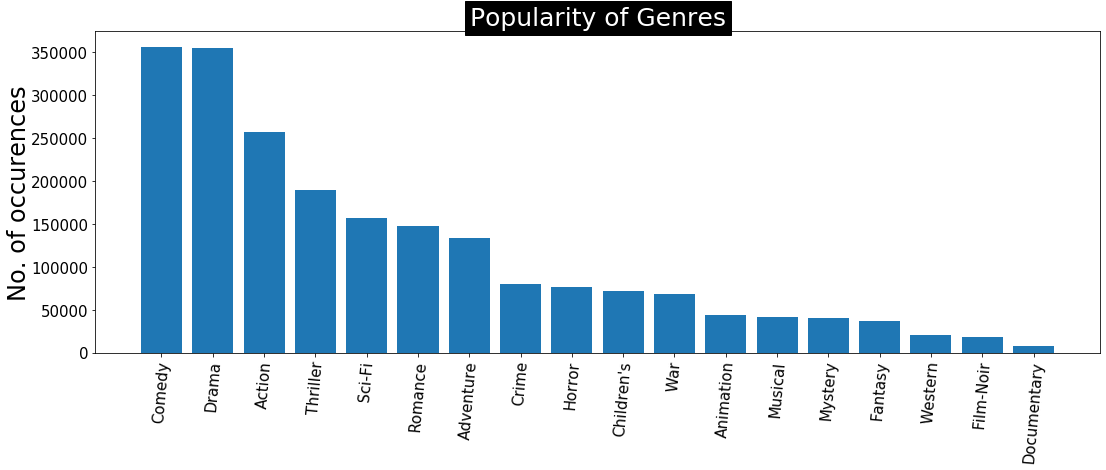

In [48]:
# Graph the Genres vs Occurrences
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]
x_label = [i[0] for i in keyword_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [49]:
# Convert Genres in row to Columns
# New Column is created for every genre

tempDF = newmaster_data

for (key,cnt) in keyword_occurences:
    tempDF.loc[tempDF['Genres'].str.contains(key), key] = 1
    tempDF[key] = tempDF[key].fillna(0)


tempDF.head()

,MovieID,Title,Genres,Rating,Comedy,Drama,Action,Thriller,Sci-Fi,Romance,...,Horror,Children's,War,Animation,Musical,Mystery,Fantasy,Western,Film-Noir,Documentary
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,661,James and the Giant Peach (1996),Animation|Children's|Musical,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,914,My Fair Lady (1964),Musical|Romance,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3408,Erin Brockovich (2000),Drama,4,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
len(tempDF.columns)

22

In [51]:
tempDF.columns

Index(['MovieID', 'Title', 'Genres', 'Rating', 'Comedy', 'Drama', 'Action',
       'Thriller', 'Sci-Fi', 'Romance', 'Adventure', 'Crime', 'Horror',
       'Children's', 'War', 'Animation', 'Musical', 'Mystery', 'Fantasy',
       'Western', 'Film-Noir', 'Documentary'],
      dtype='object')

In [52]:
tempDF.columns[3:]

Index(['Rating', 'Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi', 'Romance',
       'Adventure', 'Crime', 'Horror', 'Children's', 'War', 'Animation',
       'Musical', 'Mystery', 'Fantasy', 'Western', 'Film-Noir', 'Documentary'],
      dtype='object')

# 5. Determine the features(Genres) affecting the ratings of any particular movie. 

In [53]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [54]:
X1 = tempDF.drop(['MovieID', 'Title', 'Genres','Rating',],axis=1) # Feature Matrix
X1.head()

,Comedy,Drama,Action,Thriller,Sci-Fi,Romance,Adventure,Crime,Horror,Children's,War,Animation,Musical,Mystery,Fantasy,Western,Film-Noir,Documentary
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
Y1 = tempDF["Rating"]  # Target Vector
Y1.head()

0    5
1    3
2    3
3    4
4    5
Name: Rating, dtype: int64

## 5.1 Feature Extraction using PCA
####  The number of components cosidered is 5

In [56]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(X1)
print(pca.explained_variance_ratio_)
print(pca.n_components_)
print(pca_data)

[0.20685039 0.1779924  0.10253341 0.08269111 0.07063024]
5
[[-0.22720115 -0.7740863  -0.07707301 -0.19385257 -0.05151281]
 [-0.14018649  0.19482825  0.19961602 -0.94679524  0.747325  ]
 [-0.1878146   0.06286504  0.06423611  0.24011073  1.02297774]
 ...
 [-0.77048461 -0.23063031 -0.20190824  0.05344617 -0.47027706]
 [-0.22720115 -0.7740863  -0.07707301 -0.19385257 -0.05151281]
 [ 0.08524462 -0.50402029 -0.37837015 -0.90704611  0.23463549]]


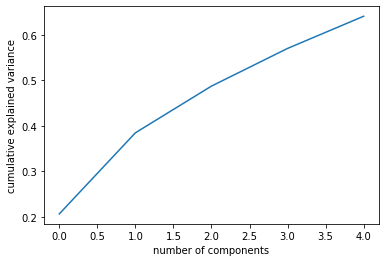

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [58]:
principalXDf = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2','PC3','PC4','PC5'])
principalXDf.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.227201,-0.774086,-0.077073,-0.193853,-0.051513
1,-0.140186,0.194828,0.199616,-0.946795,0.747325
2,-0.187815,0.062865,0.064236,0.240111,1.022978
3,-0.227201,-0.774086,-0.077073,-0.193853,-0.051513
4,-0.646038,0.700844,0.069217,-0.577127,0.175075


In [59]:
print('Sample PCA data:')
print(principalXDf.sample(5))
print('')

Sample PCA data:
             PC1       PC2       PC3       PC4       PC5
799553 -0.315749 -0.842532 -0.384922  0.502549  0.668958
642938  0.362486  0.027222  1.048816 -0.119714  0.168273
274256 -0.813036  0.752005 -0.067123 -0.073331  1.024875
221383  1.158335  0.250096  0.111267  0.301262 -0.010754
690285  1.235981  0.236955  0.324699  0.150285 -0.212730



In [60]:
# Split the data.
principalXDf['intercept'] = 1.0

In [61]:
print('Sample PCA data:')
print(principalXDf.sample(5))
print('')

Sample PCA data:
             PC1       PC2       PC3       PC4       PC5  intercept
974707  0.660546  0.114671  0.681177 -0.235833  0.077294        1.0
129183  1.163127  0.423864 -0.759911 -0.244294  0.006481        1.0
43697  -0.154041 -0.173820 -0.464516  0.554474 -0.981721        1.0
681122 -0.227201 -0.774086 -0.077073 -0.193853 -0.051513        1.0
531046  0.111085 -0.809487  0.598817  0.092852 -0.108073        1.0



In [62]:
principalYDf = pd.DataFrame(data = Y1, columns = ['Rating'])
principalYDf.head()

,Rating
0,5
1,3
2,3
3,4
4,5


In [63]:
print(principalYDf.sample(5))

        Rating
148999       4
990331       3
995880       2
133323       4
783242       4


In [64]:
from sklearn.model_selection import train_test_split 

In [65]:
X_train, X_test, y_train, y_test = train_test_split(principalXDf, principalYDf, test_size = 0.2, random_state = 0)

In [66]:
# Fit the logistic regression model.
logitReg = LogisticRegression()
logit_model = logitReg .fit(X_train, y_train)

C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [67]:
result = logitReg.predict(X_test)

In [68]:
estimated = pd.Series(result, name='Estimated Values')

In [69]:
final_result = pd.concat([y_test, estimated], axis=1)

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.3479769248457824
[[    0     0     0 11115     0]
 [    0     0     0 21589     0]
 [    0     0     0 52867     0]
 [    0     0     0 69610     0]
 [    0     0     0 44861     0]]


C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     11115
           2       0.00      0.00      0.00     21589
           3       0.00      0.00      0.00     52867
           4       0.35      1.00      0.52     69610
           5       0.00      0.00      0.00     44861

    accuracy                           0.35    200042
   macro avg       0.07      0.20      0.10    200042
weighted avg       0.12      0.35      0.18    200042



C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 5.2  Recursive Feature Elimination
## The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

In [75]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model,4)
fit = rfe.fit(X1, Y1)
print("Num Features: %d"%fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

Num Features: 4
Selected Features: [False  True False False False False False False  True False False False
 False False False False  True  True]
Feature Ranking: [15  1  9 11 13 10 12  7  1  3  4  2  5 14  8  6  1  1]


###  Top Features Selected by RFE are : [Drama,Horror,FilmNoir, & Documentary ] 

## 5.3 Wrapper Method 

#### Backward Elimination
Here  all the possible features are fed to the model at first. The performance of the model is checked  iteratively  to remove the worst performing features one by one till the overall performance of the model comes in acceptable range.
The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then such feature will be  removed. 
Here the model considered is OLS and number of iteration used is 1.

In [76]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X1)
#Fitting sm.OLS model
model = sm.OLS(Y1,X_1).fit()
model.pvalues

C:\Users\thyagaraj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           0.000000e+00
Comedy          7.459175e-09
Drama           0.000000e+00
Action         4.908980e-246
Thriller        5.153239e-70
Sci-Fi          3.759311e-14
Romance         9.703639e-02
Adventure       5.520290e-04
Crime          1.844829e-108
Horror          0.000000e+00
Children's      0.000000e+00
War             0.000000e+00
Animation       0.000000e+00
Musical        3.089091e-165
Mystery         5.809572e-03
Fantasy         2.480615e-24
Western         8.219282e-57
Film-Noir       0.000000e+00
Documentary    2.228159e-238
dtype: float64

In [77]:
max(model.pvalues)

0.09703638634782931

In [78]:
#Backward Elimination
cols = list(X1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi', 'Adventure', 'Crime', 'Horror', "Children's", 'War', 'Animation', 'Musical', 'Mystery', 'Fantasy', 'Western', 'Film-Noir', 'Documentary']


# 5.4 Embedded Method : Lasso regularization

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [79]:
reg = LassoCV()
reg.fit(X1, Y1)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X1,Y1))
coef = pd.Series(reg.coef_, index = X1.columns)

C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.000065
Best score using built-in LassoCV: 0.035942


In [80]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 18 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

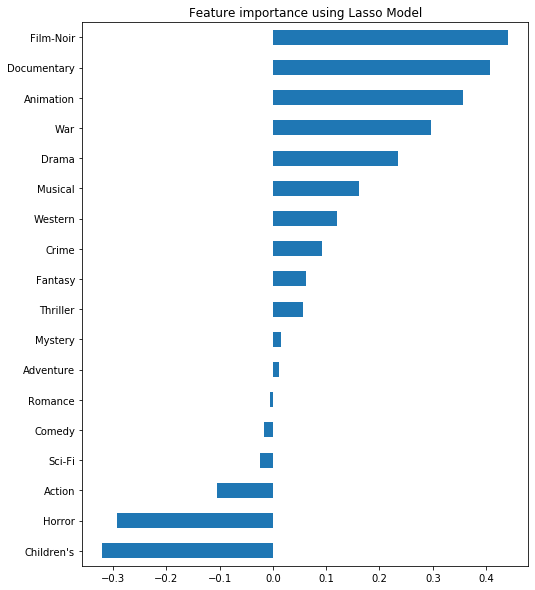

In [81]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Here Lasso model has taken all the features except Mystery , Adventure and Romance

# 5.5 Decision trees like  Extra Trees can be used to estimate the importance of features.

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
# feature extraction
model = ExtraTreesClassifier()

In [84]:
model.fit(X1, Y1)

C:\Users\thyagaraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [85]:
print(model.feature_importances_)

[0.08628949 0.12906055 0.06376983 0.06612744 0.07985825 0.05091189
 0.06255323 0.04455673 0.06486489 0.04900596 0.0853756  0.04018842
 0.03405639 0.03434786 0.02879212 0.02416006 0.04413208 0.01194921]


['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi', 'Adventure', 'Crime', 'Horror', "Children's", 'War', 'Animation', 'Musical', 'Mystery', 'Fantasy', 'Western', 'Film-Noir', 'Documentary']
### You can see that we are given an importance score for each attribute where the larger score the more important the attribute. The scores suggest at the importance of Drama,Action,Animation , Comedy and Thriller

# 5.6 Pearson Correlation using Heat Map

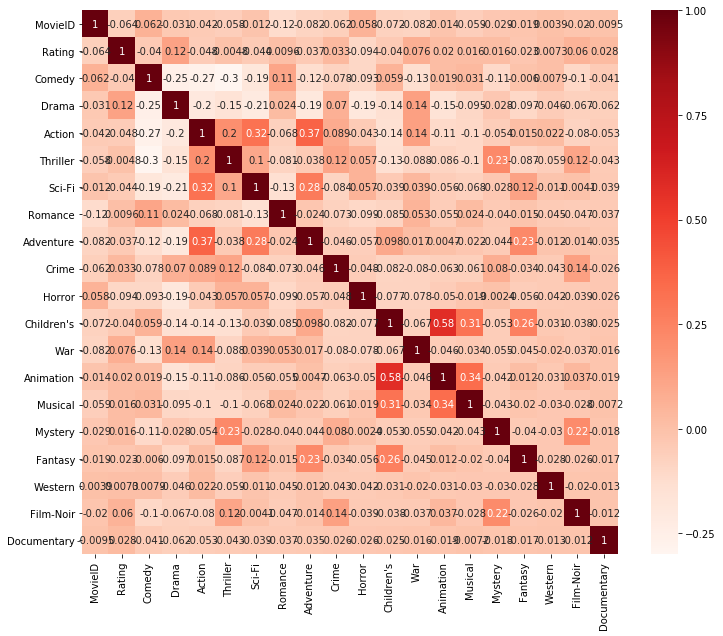

In [86]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = tempDF.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [87]:
#Correlation with output variable
cor_target = abs(cor["Rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.035]
relevant_features

MovieID       0.064042
Rating        1.000000
Comedy        0.039622
Drama         0.122561
Action        0.047633
Sci-Fi        0.044487
Adventure     0.036718
Horror        0.094353
Children's    0.039829
War           0.075688
Film-Noir     0.060259
Name: Rating, dtype: float64

## Popularity of Genres

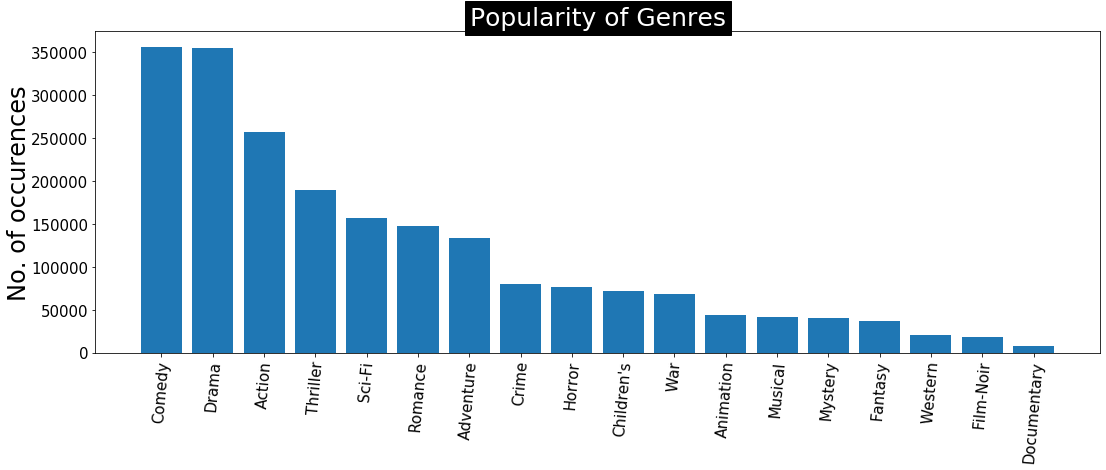

In [88]:
# Graph the Genres vs Occurrences
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]
x_label = [i[0] for i in keyword_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

# Extracting Features (Genres) affecting the Ratings of Movie " Toy story "

In [89]:
tempDF[tempDF['Title'] =="Toy Story (1995)"]

,MovieID,Title,Genres,Rating,Comedy,Drama,Action,Thriller,Sci-Fi,Romance,...,Horror,Children's,War,Animation,Musical,Mystery,Fantasy,Western,Film-Noir,Documentary
40,1,Toy Story (1995),Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
469,1,Toy Story (1995),Animation|Children's|Comedy,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
581,1,Toy Story (1995),Animation|Children's|Comedy,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
711,1,Toy Story (1995),Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1,Toy Story (1995),Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,1,Toy Story (1995),Animation|Children's|Comedy,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,1,Toy Story (1995),Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2530,1,Toy Story (1995),Animation|Children's|Comedy,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2870,1,Toy Story (1995),Animation|Children's|Comedy,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3405,1,Toy Story (1995),Animation|Children's|Comedy,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
tempDF[tempDF['Title'] =="Toy Story (1995)"].loc[40][3:]

Rating         5
Comedy         1
Drama          0
Action         0
Thriller       0
Sci-Fi         0
Romance        0
Adventure      0
Crime          0
Horror         0
Children's     1
War            0
Animation      1
Musical        0
Mystery        0
Fantasy        0
Western        0
Film-Noir      0
Documentary    0
Name: 40, dtype: object

In [91]:
influential_features = ['Title', 'Rating', 'Comedy', 'Children\'s', 'Animation'] 
tempDF[influential_features].corr() 

,Rating,Comedy,Children's,Animation
Rating,1.000000,-0.039622,-0.039829,0.019670
Comedy,-0.039622,1.000000,0.058711,0.018544
Children's,-0.039829,0.058711,1.000000,0.576204
Animation,0.019670,0.018544,0.576204,1.000000


In [92]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') 

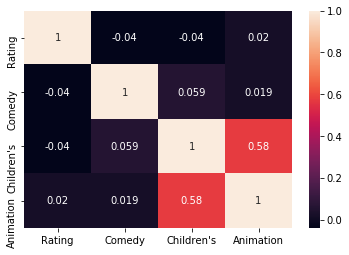

In [93]:
sn.heatmap(tempDF[influential_features].corr(), annot=True); 

In [94]:
tempDF[influential_features][tempDF['Title']=="Toy Story (1995)"]

,Title,Rating,Comedy,Children's,Animation
40,Toy Story (1995),5,1.0,1.0,1.0
469,Toy Story (1995),4,1.0,1.0,1.0
581,Toy Story (1995),4,1.0,1.0,1.0
711,Toy Story (1995),5,1.0,1.0,1.0
837,Toy Story (1995),5,1.0,1.0,1.0
1966,Toy Story (1995),4,1.0,1.0,1.0
2276,Toy Story (1995),5,1.0,1.0,1.0
2530,Toy Story (1995),3,1.0,1.0,1.0
2870,Toy Story (1995),4,1.0,1.0,1.0
3405,Toy Story (1995),3,1.0,1.0,1.0


In [95]:
toystory_data = tempDF[tempDF.MovieID==1]
toystory_data.head(10)

,MovieID,Title,Genres,Rating,Comedy,Drama,Action,Thriller,Sci-Fi,Romance,...,Horror,Children's,War,Animation,Musical,Mystery,Fantasy,Western,Film-Noir,Documentary
40,1,Toy Story (1995),Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
469,1,Toy Story (1995),Animation|Children's|Comedy,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
581,1,Toy Story (1995),Animation|Children's|Comedy,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
711,1,Toy Story (1995),Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1,Toy Story (1995),Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,1,Toy Story (1995),Animation|Children's|Comedy,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,1,Toy Story (1995),Animation|Children's|Comedy,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2530,1,Toy Story (1995),Animation|Children's|Comedy,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2870,1,Toy Story (1995),Animation|Children's|Comedy,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3405,1,Toy Story (1995),Animation|Children's|Comedy,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
toystory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [97]:
toystory_data_group = toystory_data.groupby('Rating')
toystory_data_group.agg({'Rating':'mean'})

,Rating
Rating,
1,1
2,2
3,3
4,4
5,5


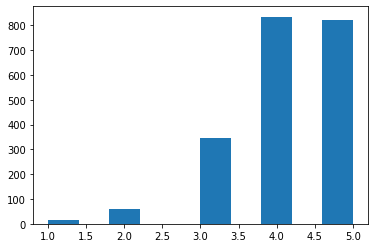

In [98]:
plt.hist(x=toystory_data['Rating'])
plt.show()

### The above plot shows that the movie 'Toystory' has got 4 ** (stars) maximum¶

# 6 Develop an appropriate model to predict the movie ratings Dataset Description :

In [99]:
from sklearn.model_selection import train_test_split 
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25)

In [100]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750156, 18), (250053, 18), (750156,), (250053,))

In [101]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

In [102]:
result = logitReg.predict(x_test)

In [103]:
estimated = pd.Series(result, name='Estimated Values')

In [104]:
final_result = pd.concat([y_test, estimated], axis=1)

In [105]:
# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.35114555714188594
[[    0     0  1440 12490   179]
 [    0     0  1984 24611   453]
 [    0     0  3677 59845  1603]
 [    0     0  3412 80868  3295]
 [    0     0  1644 51292  3260]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     14109
           2       0.00      0.00      0.00     27048
           3       0.30      0.06      0.10     65125
           4       0.35      0.92      0.51     87575
           5       0.37      0.06      0.10     56196

    accuracy                           0.35    250053
   macro avg       0.21      0.21      0.14    250053
weighted avg       0.29      0.35      0.23    250053



### Accuracy of the above model is > 35 %

In [106]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [114]:
# Selecting different Models
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.349170 (0.002053)
LDA: 0.350055 (0.002023)
NB: 0.283064 (0.001612)


# Other Models

In [107]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

31.59

In [108]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

34.96

In [109]:
# Stochastic Gradient Descent
from sklearn import linear_model
sgd = linear_model.SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

27.61

In [110]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

36.36

In [111]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

36.36

In [112]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_random_forest, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,36.36
4,Decision Tree,36.36
3,Linear SVC,34.96
1,Perceptron,31.59
2,Stochastic Gradient Decent,27.61


# From the above implementations it is clear that Decision Tree or Random Forest is Most Suitable

## The project Was done by Dr.Thyagaraju G S as part of Assessment of SimpliLEarn Data Science using Python Course.
